# Visualization and Exploration of Data

`Playing with matplotlib and seaborn`

### Useful references

1. **Chapter 7** of *A Python Data Analyst’s Toolkit--Learn Python and Python-based Libraries with Applications in Data Analysis and Statistics*, by Gayathri Rajagopalan; https://link.springer.com/book/10.1007/978-1-4842-6399-0

1. **Chapter 4** of *Python Machine Learning*, by Wei-Meng Lee; https://www.wiley.com/en-us/Python+Machine+Learning-p-9781119545637

1. **Chapter 3,4** of *Hands-on Machine Learning with Python-Implement Neural Network Solutions with Scikit-learn and PyTorch*, by Ashwin Pajankar , Aditya Joshi; https://link.springer.com/book/10.1007/978-1-4842-7921-2

In [1]:
import numpy as np
import pandas as pd

# visualization packages:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# set seaborn's default settings
sns.set() 

We have imported all the packages and libraries we will be using for the initial exploration of data. This notebook will be split into two major sections, majorly:

 - Exploration and Visualization using pandas and seaborn packages
 - Building evaluating and tuning different regression models using scikit learn package

## Part 1: So let's begin this exploratory journey into the data-set to reveal its hidden secrets!!
In order to begin this exciting journey into the unchartered lands of the auto-mpg data set we  first need to know the location of this unexplored land.
For our dataset, this location is  '../input/auto-mpg.csv'
So lets tell python to take us to this place. Since we are the first explorers here, we will call this place data..because we like data..

In [3]:
#df = pd.read_csv('myDataSets/auto-mpg.csv', index_col='car name')
data = pd.read_csv('myDataSets/mpg-raw.csv')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
# so now the data is in rectangular form with 398 entries each having 9 distinct properties
data.shape

(398, 9)

In [6]:
data.index

RangeIndex(start=0, stop=398, step=1)

In [7]:
# let's list all the columns
columns = list(data.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [8]:
# we now describe the properties of this dataframe like column datatype etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


```python
data.rename(columns={"model year": "model_year", "car name": "name"}, inplace = True)
data.head()
```

In [9]:
cats = list(data.select_dtypes(include=['object']).columns)
print(f'categorical variables:  {cats}')

categorical variables:  ['origin', 'name']


In [10]:
type(cats)

list

In [11]:
nums = list(data.select_dtypes(exclude=['object']).columns)
print(f'numerical variables:  {nums}')

numerical variables:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [12]:
type(nums)

list

In [13]:
# let's inspect how many unique values are there in each column.
data.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

    As there are very few unique values for cylinders and model_year, so it's safe to make them categorical instea of numeric.

In [14]:
# cylinders and model_year also seems to be categorical so lets update the lists
cats.extend(['cylinders', 'model_year'])
nums.remove('cylinders')
nums.remove('model_year')

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year']
numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


    Now inspect for nans in data.

In [15]:
# find columns or rows with missing data:
# it returns a new DataFrame with cells containing a True of False value: 
data.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [16]:
# count for `nans` in each column:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [17]:
# find columns or rows with missing data:
# it returns a new DataFrame with cells containing a True of False value: 
data.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [18]:
# check whether any of the columns contain null values: 
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [19]:
# count how many null values exist in each column: 
data.isnull().sum()
# by default it returns for the columns, so axis=0:
#data.isnull().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [20]:
data.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [21]:
# nan rows proportion in data
6 / len(data)

0.01507537688442211

In [22]:
# let's print these 6 `nan` containing rows 
data[data.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [23]:
# count missing features in each entry:
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Length: 398, dtype: int64

    So horsepower consists of total of 6 nan rows comprising of around 1.5% of data. As this fraction is very low so it's safe to drop these nan rows for now.

<sup>Note: If the nan-row proportion is large enough then we won't drop it but instead impute missing values.<sup>

In [24]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {data.duplicated().sum()}')

# drop duplicate rows if any
data = data[~data.duplicated()]
data.shape

total duplicate rows: 0


(398, 9)

In [25]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [26]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

Now everything looks in order so lets continue, let's describe the dataset

In [27]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [28]:
# before we move ahead it's a good practice to group all variables together having same type.
df = pd.concat((data[cats], data[nums]), axis=1)
df.head()

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,17.0,302.0,140.0,3449,10.5


In [29]:
num_rows, num_cols = df.shape
print('number of entries: ',num_rows)
print('number of features: ',num_cols)

number of entries:  398
number of features:  9


    Now we are all good to go for some in-depth analysis

# Visualizing Data

Text(0, 0.5, 'horsepower')

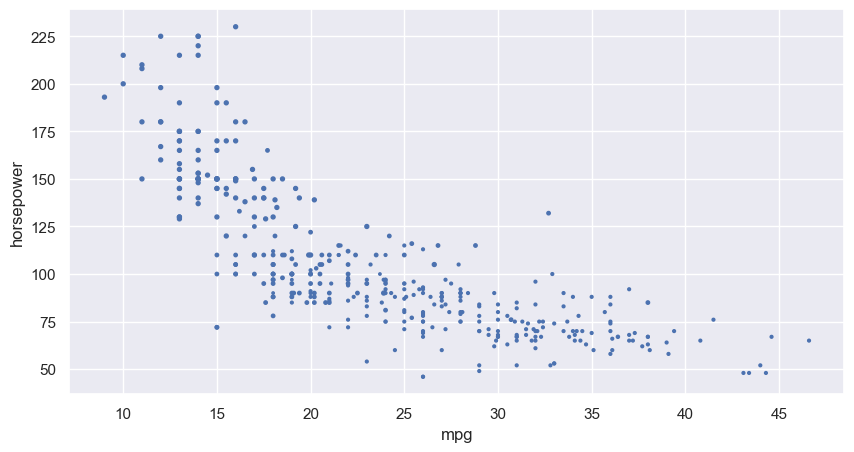

In [30]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.scatter(x=df.mpg, y=df.horsepower, s=df.cylinders)
ax1.set_xlabel('mpg')
ax1.set_ylabel('horsepower')

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

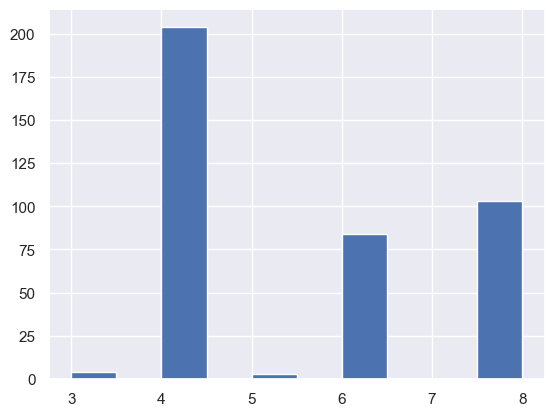

In [31]:
plt.hist(df.cylinders)

## Plotting with `pandas`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='horsepower', ylabel='mpg'>

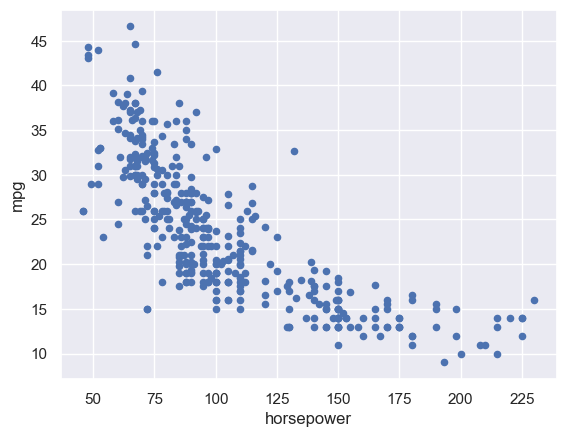

In [32]:
df.plot(x='horsepower', y='mpg', kind='scatter', color='b')

<Axes: xlabel='horsepower', ylabel='mpg'>

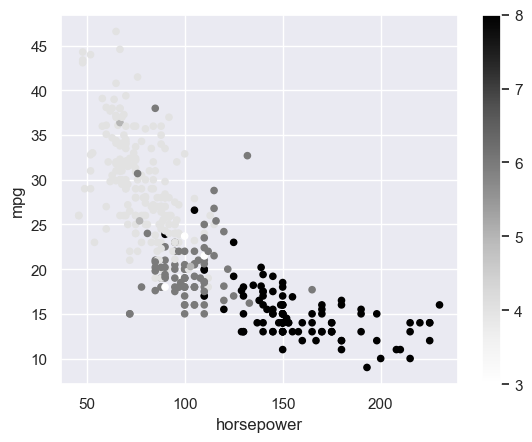

In [33]:
df.plot(x='horsepower', y='mpg', kind='scatter', color=df.cylinders, colorbar=True)

<Axes: ylabel='Frequency'>

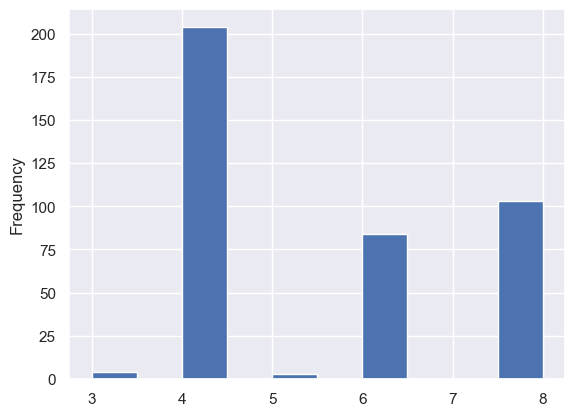

In [34]:
df['cylinders'].plot(kind='hist')

<Axes: ylabel='cylinders'>

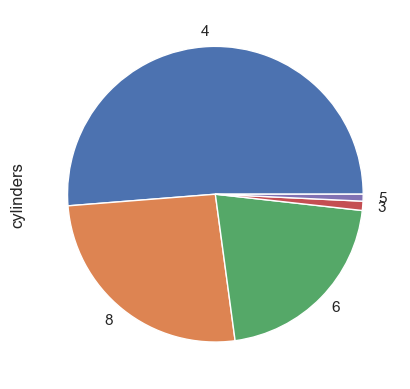

In [35]:
df['cylinders'].value_counts().plot(kind='pie')

<Axes: ylabel='origin'>

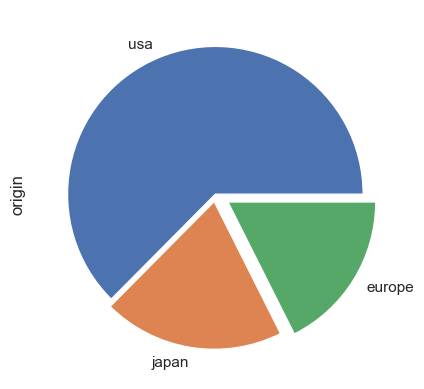

In [36]:
df['origin'].value_counts().plot(kind='pie', explode=[0.0, 0.05, 0.1])

## Visualization with `seaborn`

### Scatter plot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

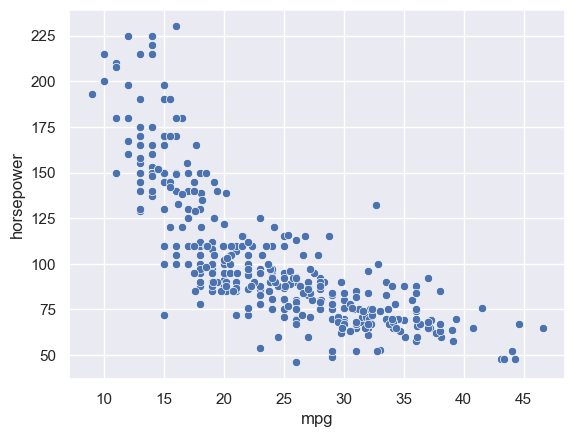

In [37]:
sp1 = sns.scatterplot(data=df, x='mpg', y='horsepower')

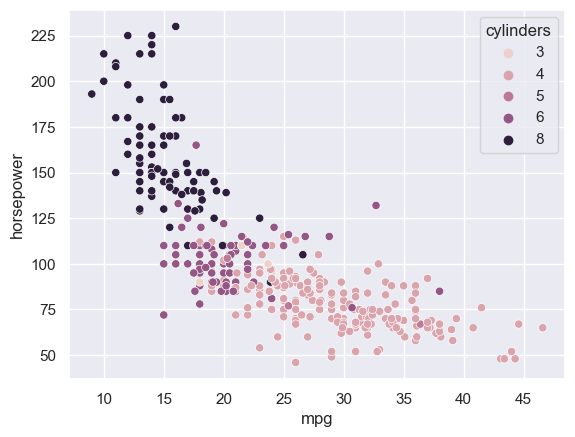

In [38]:
sp2 = sns.scatterplot(data=df, x='mpg', y='horsepower', hue='cylinders')

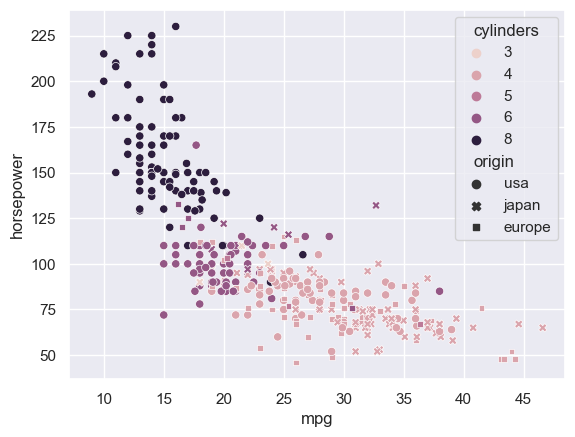

In [39]:
sp3 = sns.scatterplot(data=df, x='mpg', y='horsepower', hue='cylinders', style='origin')

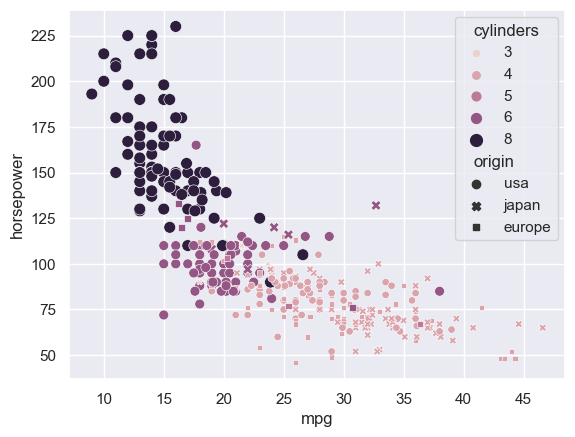

In [40]:
sp4 = sns.scatterplot(data=df, x='mpg', y='horsepower', hue='cylinders', style='origin', size='cylinders')

### Box plots

https://seaborn.pydata.org/generated/seaborn.boxplot.html

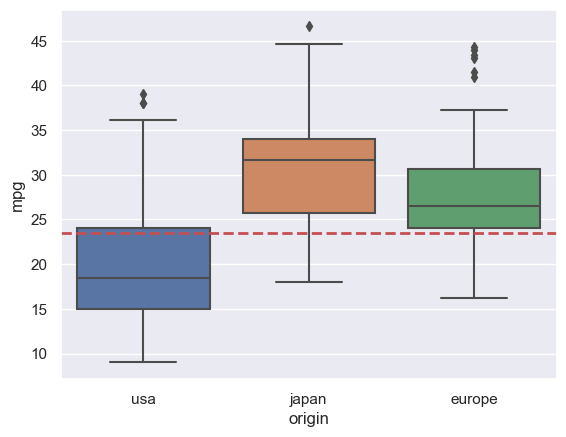

In [41]:
bp1 = sns.boxplot(data=df, x='origin', y='mpg')
plt.axhline(df.mpg.mean(), color='r', linestyle='dashed', linewidth=2)

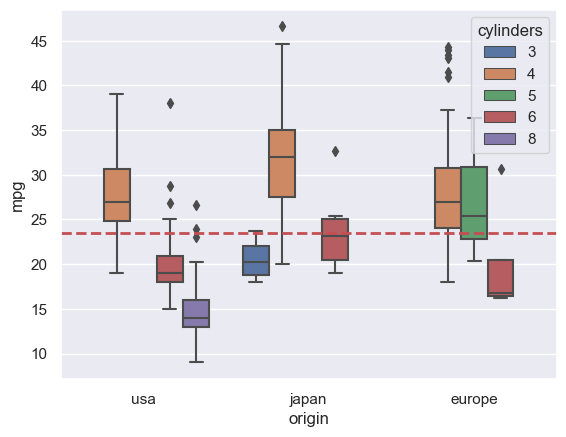

In [42]:
bp2 = sns.boxplot(data=df, x='origin', y="mpg", hue="cylinders")
plt.axhline(df.mpg.mean(), color='r', linestyle='dashed', linewidth=2)

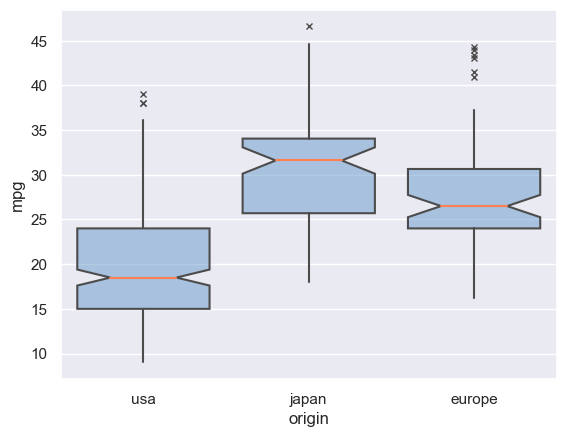

In [43]:
bp3 = sns.boxplot(data=df, x='origin', y='mpg', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

### Kernel density estimate

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

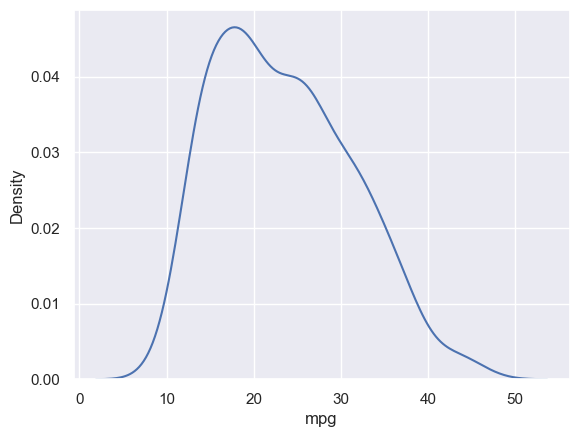

In [44]:
kde1 = sns.kdeplot(data=df, x='mpg')

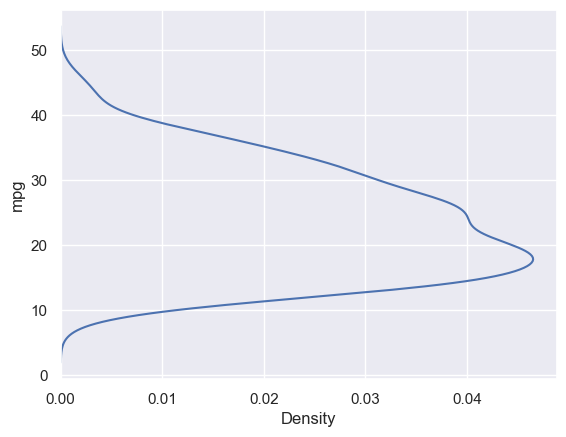

In [45]:
kde2 = sns.kdeplot(data=df, y='mpg')

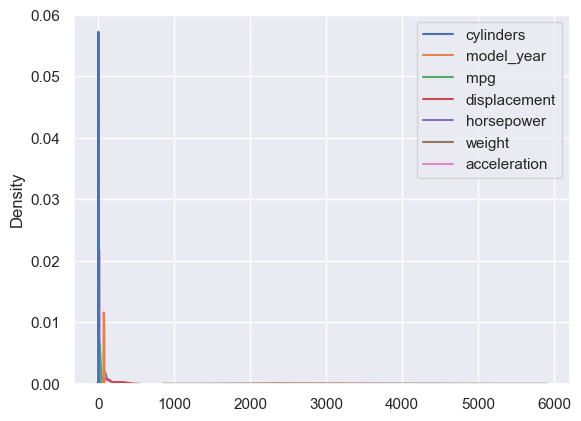

In [46]:
# Plot distributions for each column of a wide-form dataset:
kde3 = sns.kdeplot(data=df)

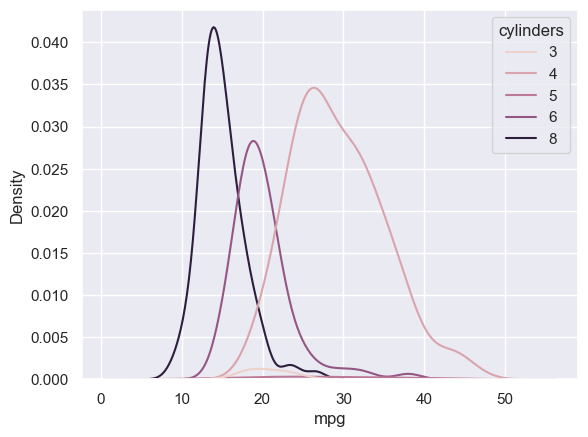

In [47]:
kde4 = sns.kdeplot(data=df, x='mpg', hue='cylinders')

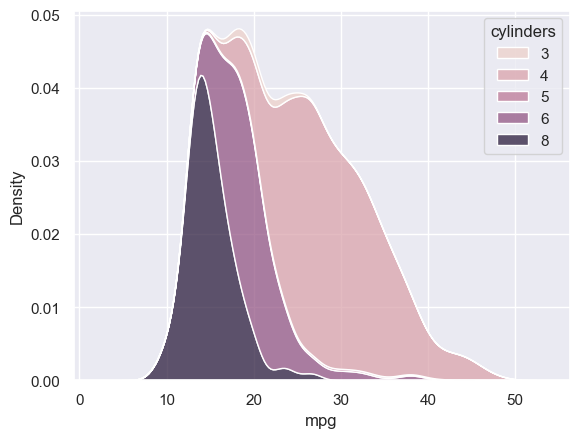

In [48]:
kde5 = sns.kdeplot(data=df, x='mpg', hue='cylinders', multiple='stack')

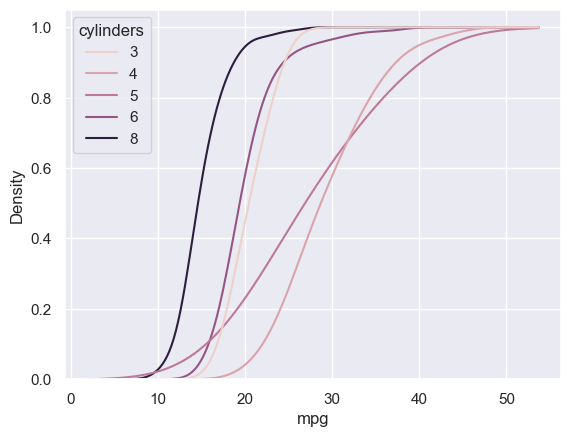

In [49]:
# Estimate the cumulative distribution function(s), normalizing each subset:
kde6 = sns.kdeplot(data=df, x='mpg', hue='cylinders', 
                   cumulative=True, common_norm=False, common_grid=True
                  )

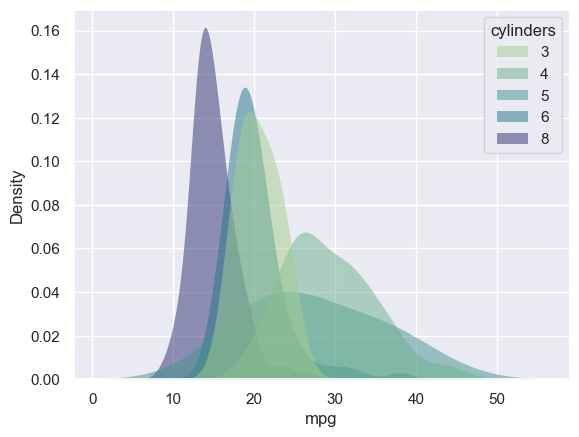

In [50]:
kde7 = sns.kdeplot(data=df, x='mpg', hue='cylinders',
                   fill=True, common_norm=False, palette="crest", 
                   alpha=.5, linewidth=0,
                  )

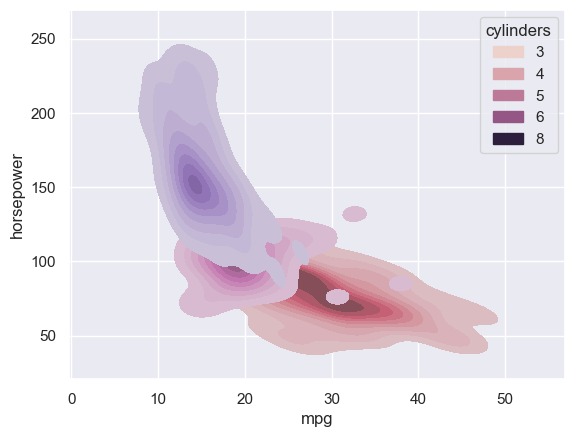

In [51]:
# Plot a bivariate distribution:
kdebi1 = sns.kdeplot(data=df, x='mpg', y='horsepower', hue='cylinders', fill=True)

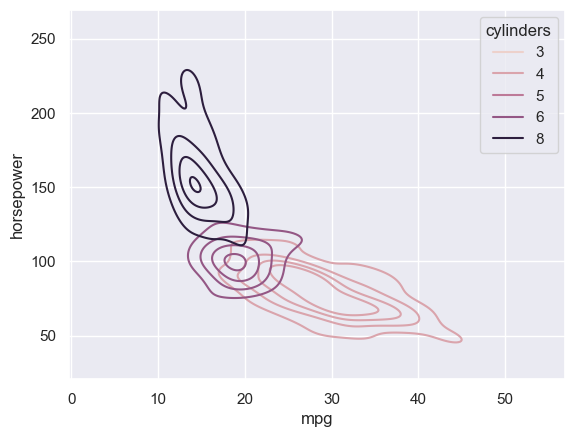

In [52]:
kdebi2 = sns.kdeplot(data=df, x='mpg', y='horsepower', hue='cylinders', 
                     levels=5, thresh=.2)

### Violin plot

https://seaborn.pydata.org/generated/seaborn.violinplot.html

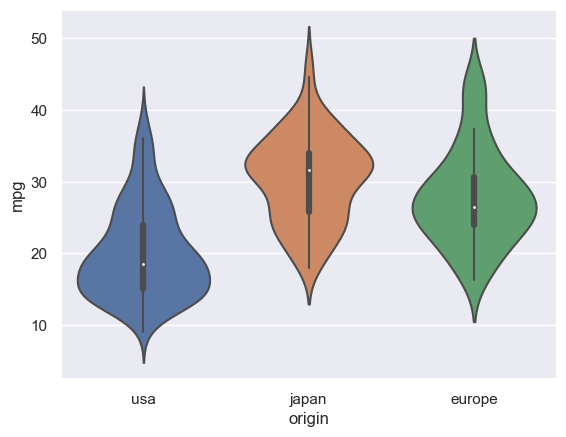

In [53]:
vp1 = sns.violinplot(data=df, x='origin', y='mpg')

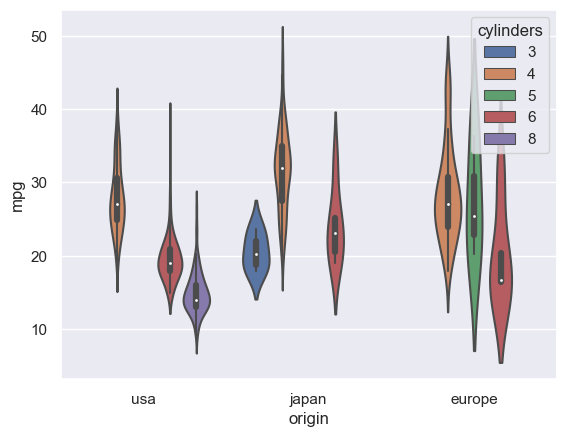

In [54]:
vp1 = sns.violinplot(data=df, x='origin', y='mpg', hue='cylinders')

### Count plots & Histograms

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://seaborn.pydata.org/generated/seaborn.histplot.html

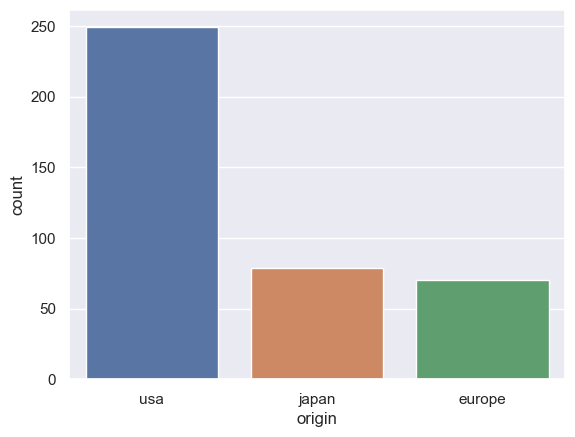

In [55]:
cp1 = sns.countplot(data=df, x='origin')

<Axes: xlabel='origin', ylabel='Count'>

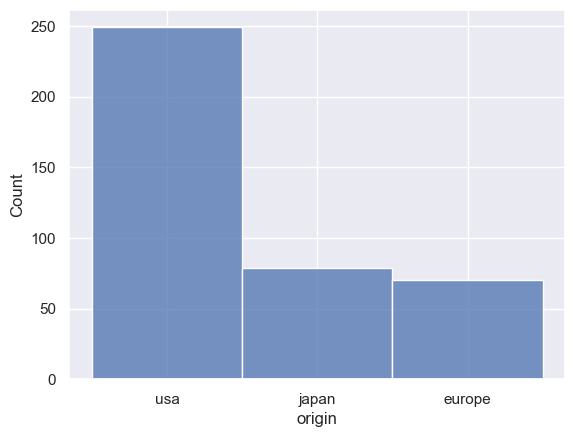

In [56]:
sns.histplot(data=df, x='origin')

<Axes: xlabel='origin', ylabel='Count'>

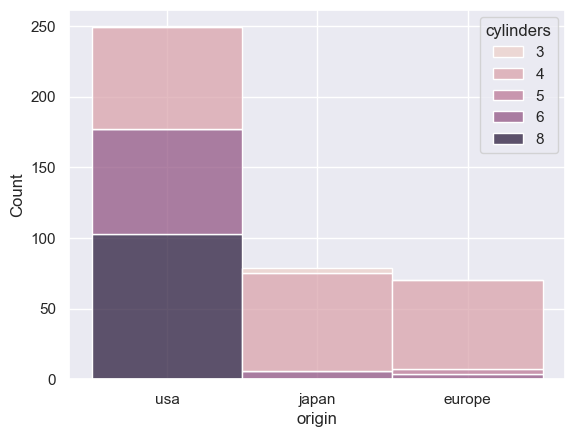

In [57]:
sns.histplot(data=df, x='origin', hue='cylinders', multiple='stack')

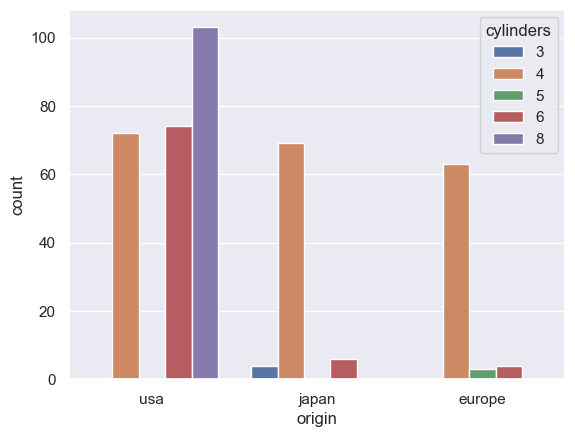

In [58]:
cp2 = sns.countplot(data=df, x='origin', hue='cylinders')

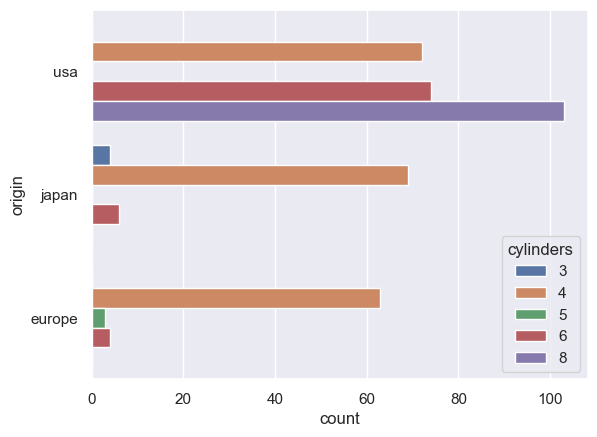

In [59]:
cp3 = sns.countplot(data=df, y='origin', hue='cylinders')

### Heatmap

https://seaborn.pydata.org/generated/seaborn.heatmap.html

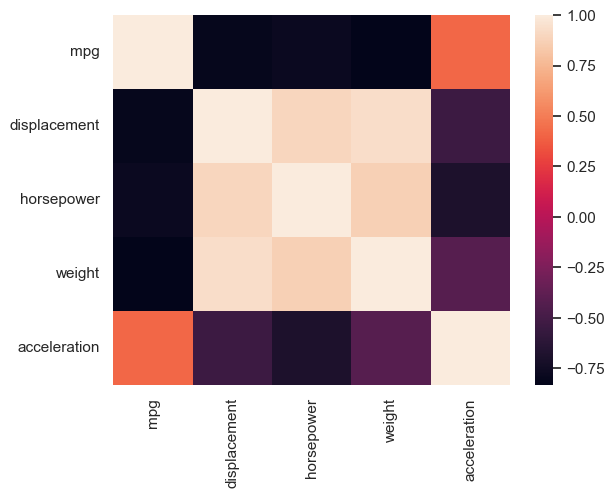

In [60]:
hm1 = sns.heatmap(df[nums].corr())

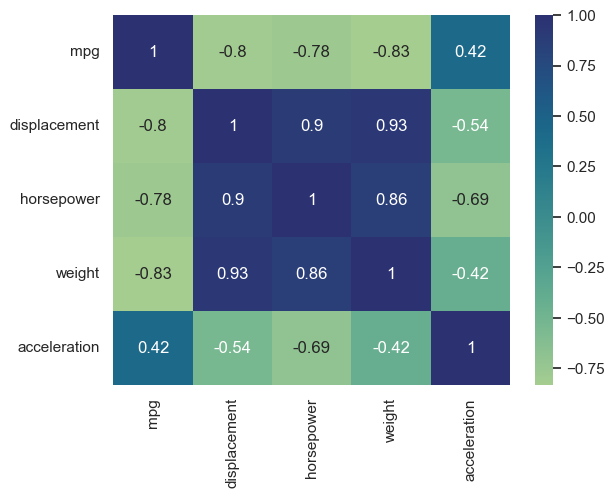

In [61]:
hm2 = sns.heatmap(df[nums].corr(), annot=True, cmap="crest")

### Strip plot

https://seaborn.pydata.org/generated/seaborn.stripplot.html

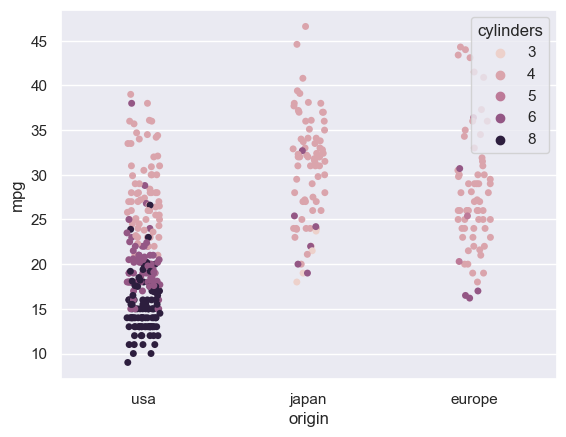

In [62]:
sp1 = sns.stripplot(data=df, x='origin', y='mpg', hue='cylinders')

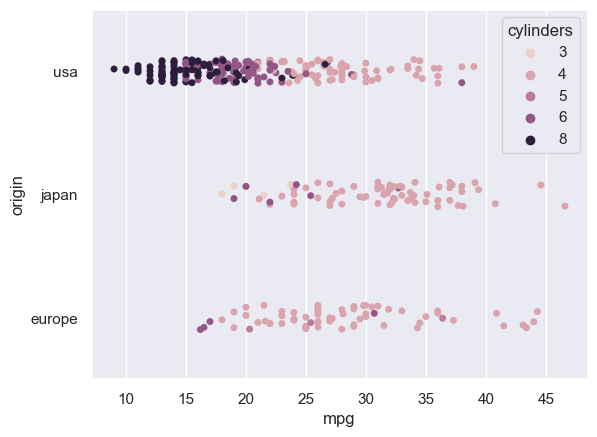

In [63]:
sp2 = sns.stripplot(data=df, x='mpg', y='origin', hue='cylinders')

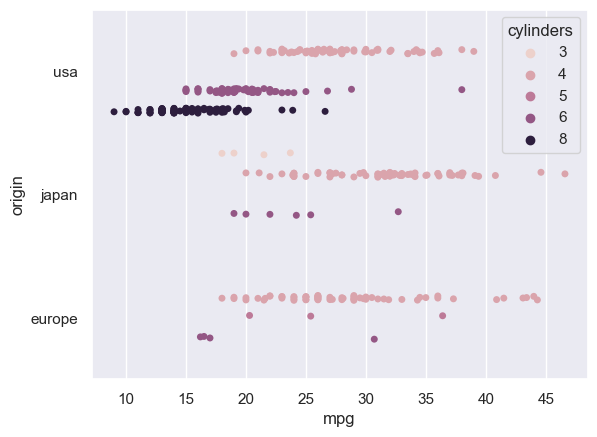

In [64]:
sp3 = sns.stripplot(data=df, x='mpg', y='origin', hue='cylinders', dodge=True, jitter=True)

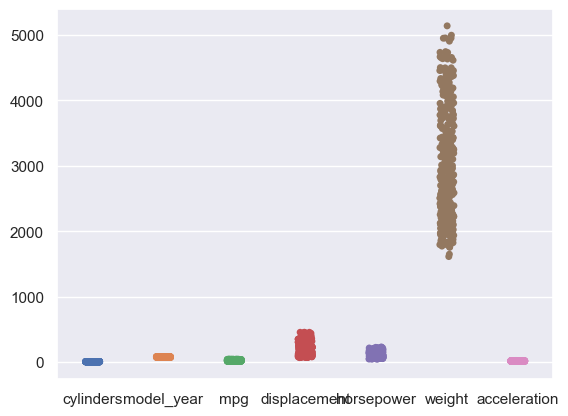

In [65]:
sp4 = sns.stripplot(data=df)

### Catplot

https://seaborn.pydata.org/generated/seaborn.catplot.html

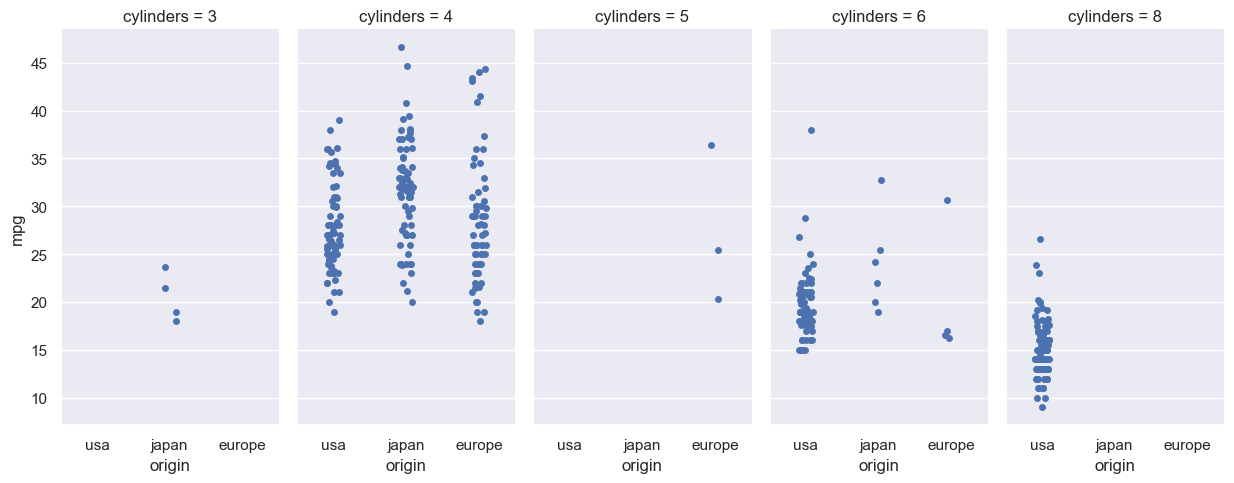

In [66]:
cp1 = sns.catplot(data=df, x='origin', y='mpg', col="cylinders", aspect=.5)

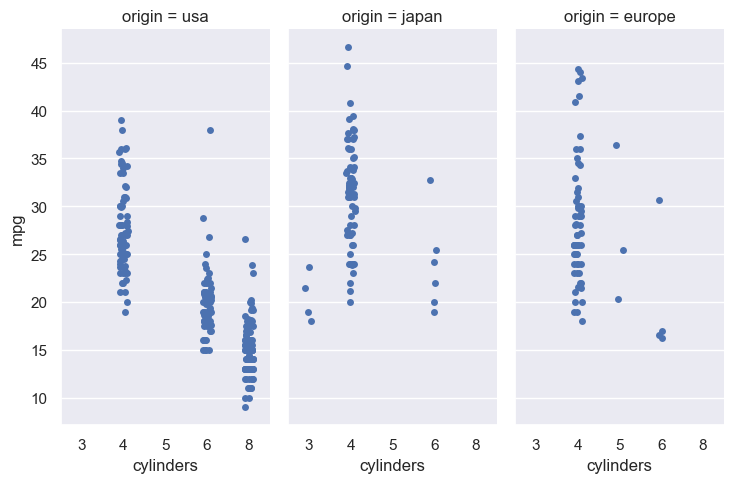

In [67]:
cp2 = sns.catplot(data=df, x='cylinders', y='mpg', col='origin', aspect=.5)

### Swarm plot

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

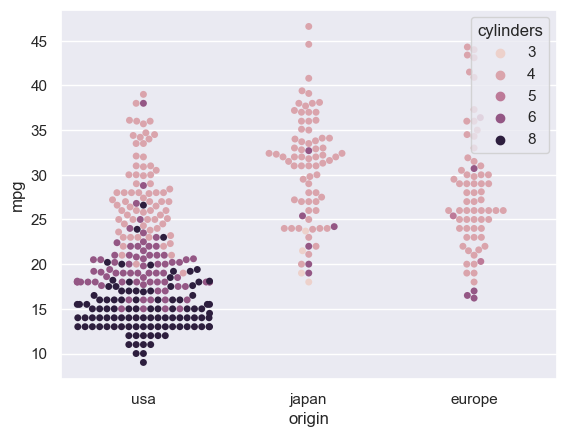

In [68]:
sw1 = sns.swarmplot(data=df, x='origin', y='mpg', hue='cylinders')

### Pair plot

https://seaborn.pydata.org/generated/seaborn.pairplot.html

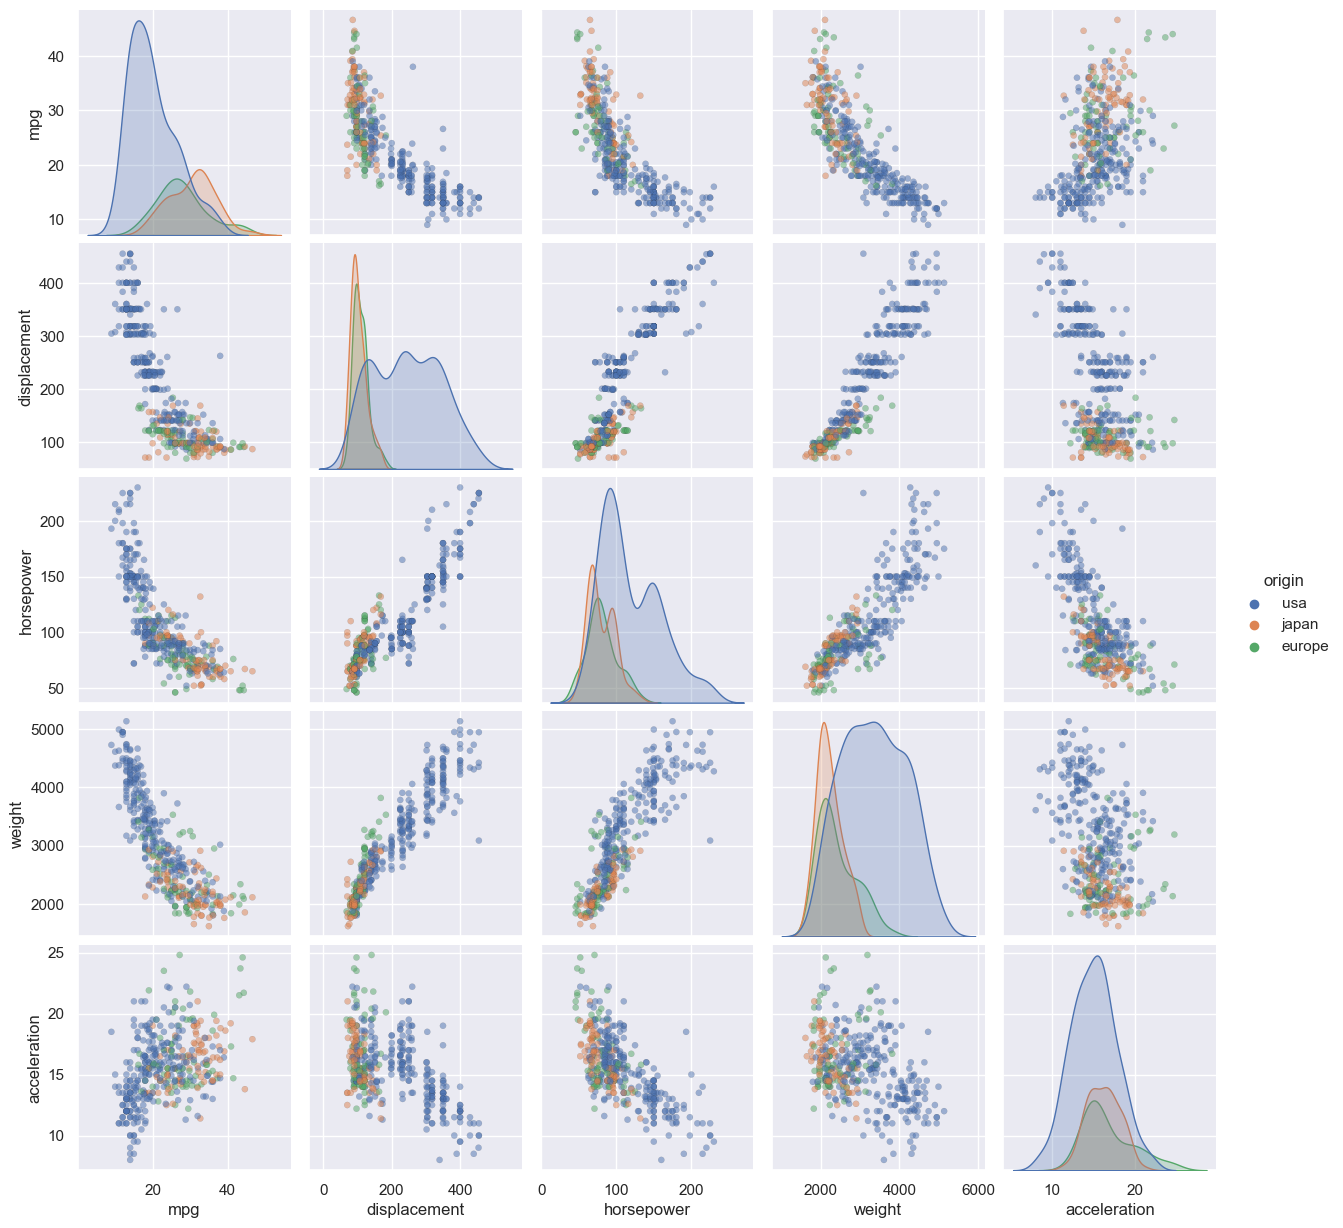

In [ ]:
sns.pairplot(data=df, vars = df[nums], diag_kind='kde', hue ='origin', 
             plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

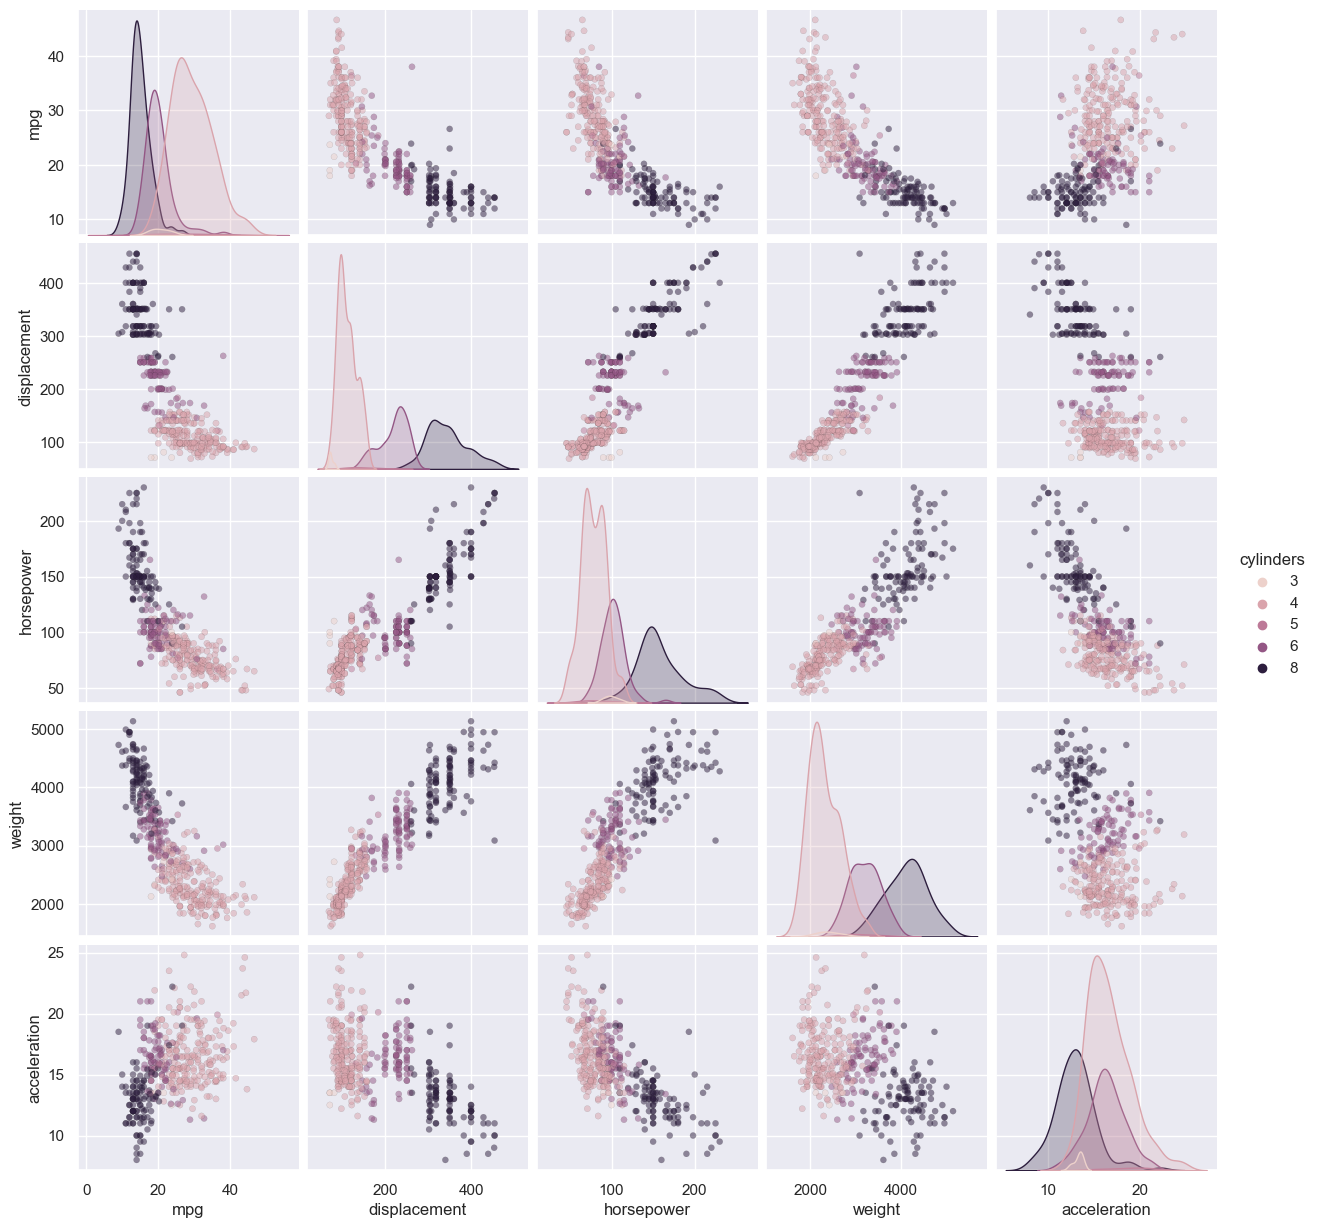

In [ ]:
sns.pairplot(data=df, vars = df[nums], diag_kind='kde', hue ='cylinders', 
             plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

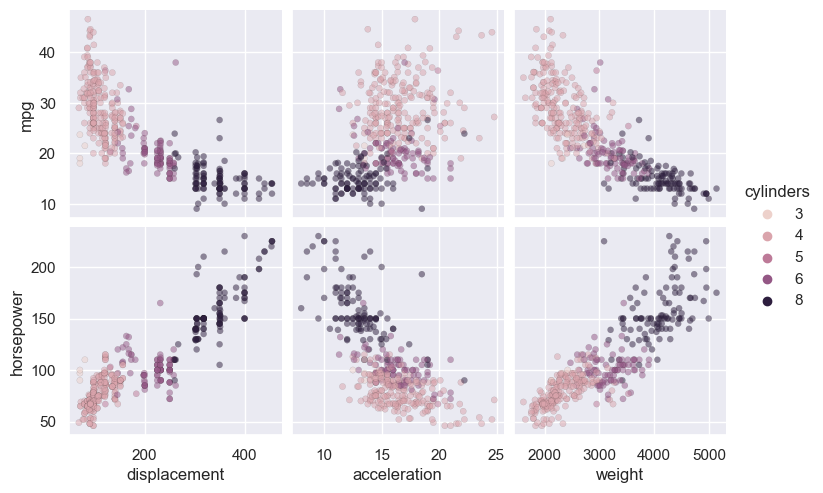

In [71]:
sns.pairplot(data=df, 
             y_vars = ['mpg', 'horsepower'], 
             x_vars = ['displacement', 'acceleration', 'weight'], 
             diag_kind='kde', hue ='cylinders', 
             plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

### Joint plot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

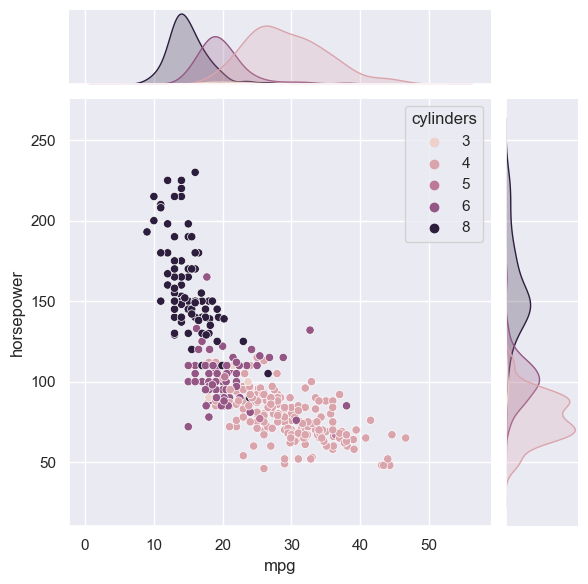

In [72]:
jp1 = sns.jointplot(data=df, x='mpg', y='horsepower', hue='cylinders')

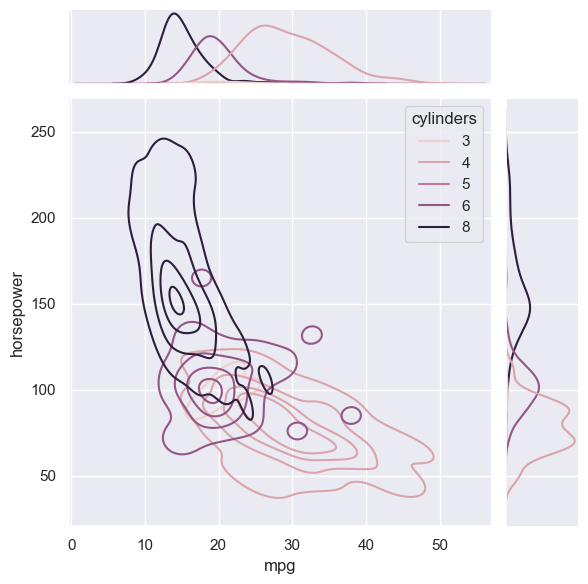

In [73]:
jp2 = sns.jointplot(data=df, x='mpg', y='horsepower', hue='cylinders', kind='kde', levels=5)

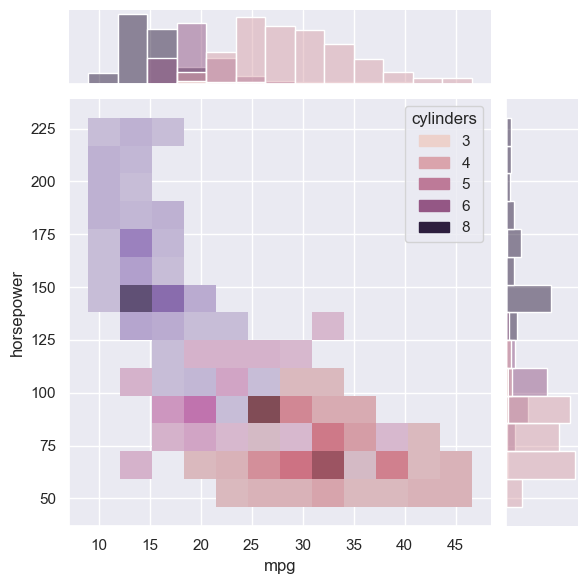

In [74]:
sns.jointplot(data=df, x="mpg", y="horsepower", kind="hist", hue='cylinders')

<Axes: xlabel='mpg', ylabel='horsepower'>

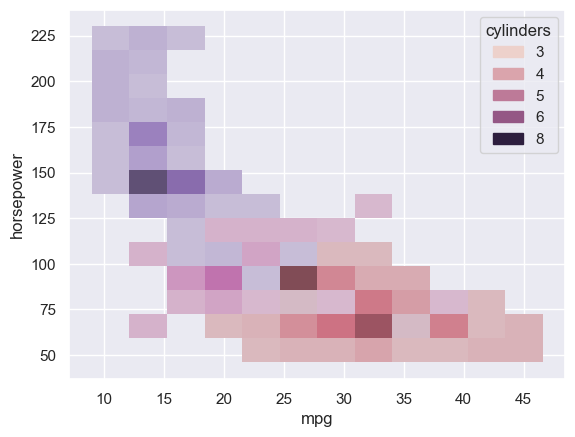

In [75]:
sns.histplot(df, x="mpg", y="horsepower", hue="cylinders")

### Facet grid

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

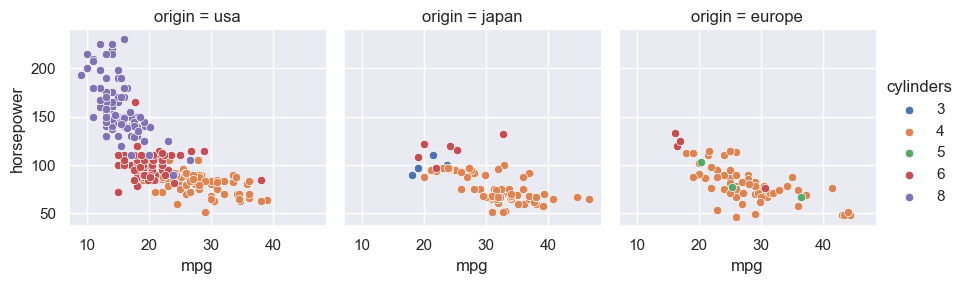

In [76]:
fg = sns.FacetGrid(df, col='origin', hue='cylinders')
fg.map_dataframe(sns.scatterplot, x="mpg", y="horsepower")
fg.add_legend()

### Parallel Coordinates

For multivariable data a parallel coordinates plot helps visualize clusters.

https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html?highlight=parallel#pandas.plotting.parallel_coordinates

In [77]:
df2 = df[nums].copy()
df2.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


In [78]:
df2['cylinders'] = df.cylinders
df2.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders
0,18.0,307.0,130.0,3504,12.0,8
1,15.0,350.0,165.0,3693,11.5,8
2,18.0,318.0,150.0,3436,11.0,8
3,16.0,304.0,150.0,3433,12.0,8
4,17.0,302.0,140.0,3449,10.5,8


<Axes: >

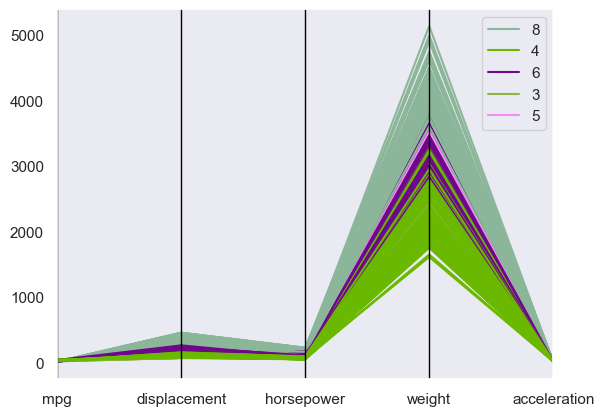

In [79]:
pd.plotting.parallel_coordinates(df2, 'cylinders')

### Parallel Coordinates

*Each Series in the DataFrame is represented as a evenly distributed slice on a circle. Each data point is rendered in the circle according to the value on each Series. Highly correlated Series in the DataFrame are placed closer on the unit circle.*

**A technique to visualize separability between targets.**

https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

<Axes: >

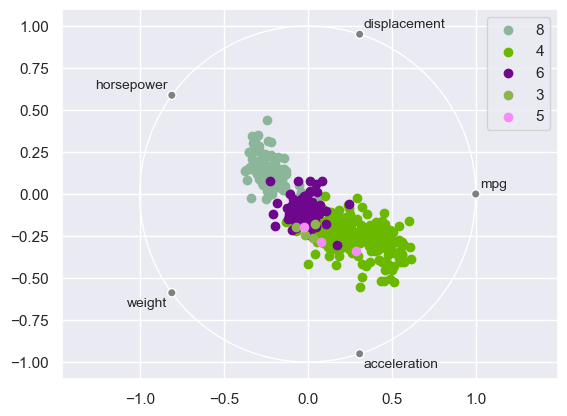

In [80]:
pd.plotting.radviz(df2, 'cylinders')